# Bayes Parameter Estimation

In the lecture, we have analyzed how the parameters of prior and posterior distributions relate analytically for Gaussian distributions. However, in the more general non-Gaussian case, the analysis is not possible. Instead, we need to use numerical methods to compute or estimate these distributions.

Let us consider data generated by a distribution of parameter $\theta$. The prior and the data-generating probability functions are the following:

$$p(\theta) = \frac{1}{2} e^{-|\theta|} \qquad \qquad p(x|\theta) = \frac{1}{2} e^{-|x-\theta|}$$

Given an observation $x$, the posterior distribution for the unkown parameter $\theta$ can be obtained from the Bayes theorem:

$$p(\theta | x) = \frac{p(\theta) p(x | \theta)}{p(x)} \qquad \text{where} \quad p(x) = \int p(\theta) p(x | \theta) d\theta$$
Suppose that we have observed the following data point:

In [3]:
x = 3.0

We now study several techniques to compute/estimate this posterior distribution based either on explicit integration or sampling.

### 1. Explicit Integration (10 P)

Applying the Bayes formula requires the computation of an integral for $p(x)$. A numerical approximation of the integral is given by the Riemann sum:
$$
p(x) = \sum_{k=-\infty}^{\infty} p(k \cdot \Delta\theta) \cdot p(x| k \cdot \Delta\theta) \cdot \Delta\theta
$$
where $\theta = k \cdot \Delta \theta$. In practice, we restrict the range of the integration where it has most of its support (i.e. choose k such that $\theta$ is between $-10$ to $10$), and consider a small constant step size $\Delta\theta = 0.05$. In your code, you should use of numpy fast operations (e.g. `numpy.sum`) when possible, and avoid explicit loops in Python.

* **Using the integration method, calculate the posterior function for the indicated range and step size.**
* **Plot the prior and posterior probability functions.**

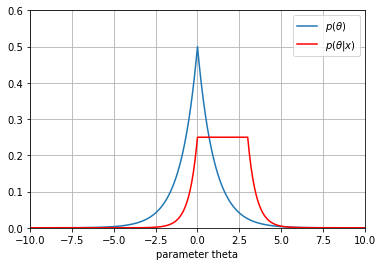

In [4]:
import numpy

def exercise1():
    # define delta theta space
    theta = numpy.arange(-10, 10.05, 0.05)
    
    # calculate prior probability function p(theta)
    prior1 = 0.5*numpy.exp(-numpy.absolute(theta))
    
    # calculate data generating probabiliy p(x|theta)
    datagen1 = 0.5*numpy.exp(-numpy.absolute(x-theta))
    
    # calculate denominator p(x) (explicit integration)
    p_x = numpy.sum(prior1*datagen1*0.05)
    
    # calculate posterior density p(theta|x)
    posterior = numpy.multiply(prior1, datagen1)/p_x
    
    import matplotlib
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.plot(theta, prior1)
    plt.plot(theta, posterior, color="red")
    plt.xlim([-10,10])
    plt.ylim([0,0.6])
    plt.xlabel("parameter theta")
    plt.grid()
    plt.legend([r"$p(\theta)$",r"$p(\theta|x)$"])

exercise1()


### 2. Basic Rejection Sampling (10 P)

When the parameter space is large, analytic integration becomes untractable, and therefore, sampling algorithms are needed. In this exercise we test on the same one-dimensional example as in exercise 1, a simple rejection sampling algorithm to approximate the posterior distribution. Let $q(\theta)$ be the joint probability function defined as $q(\theta) = p(x|\theta) \cdot p(\theta)$. The rejection sampling algorithm seeks to sample uniformly from the surface under the function $q(\theta)$ by sampling uniformly from a larger box, and rejecting samples that are not under $q(\theta)$. The algorithm operates as follows:

repeat 100000 times:

1. $\theta \sim \mathcal{U}(-10,10)$
2. $u \sim \mathcal{U}(0,1)$
3. accept $\theta$ if $u < q(\theta)$

where $\mathcal{U}(a,b)$ denotes a uniform distribution on the interval $[a,b]$. The list of accepted $\theta$s forms an empirical posterior distribution in the parameter space, that can be viewed as a probability function by computing a histogram. We use a bin size of 0.5 for the histogram.

* **Implement this simple rejection sampling algorithm (make use of numpy parallelization when possible).**
* **Create a histogram from the accepted $\theta$s, and print the rejection rate.**
* **Plot the (normalized) histogram in superposition to the functions of the previous exercise.**

Rejection rate:  0.99738


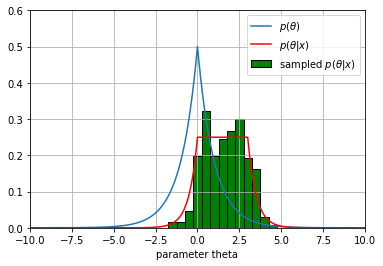

In [5]:
def exercise2():
    # generate 100000 observations of a  U(-10,10) distribution
    theta2 = numpy.random.uniform(-10,10.00005,100000)
    
    # generate 100000 observations U(0,1) distribution
    u = numpy.random.uniform(0,1.00005,100000)
    
    # calculate prior density p(theta)
    prior2 = 0.5*numpy.exp(-numpy.absolute(theta2))
    
    # calculate data generating probabiliy p(x|theta)
    datagen2 = 0.5*numpy.exp(-numpy.absolute(x-theta2))
    
    # calculate q(theta)
    q = prior2*datagen2
    
    # algorithm
    accepted = q > u
    accepted_theta = theta2[accepted]
    
    # plotting functions of problem 1
    import matplotlib
    from matplotlib import pyplot as plt
    %matplotlib inline
    exercise1()
    
    # plotting histogram of sampled postrior
    bins_array = numpy.arange(numpy.min(accepted_theta), numpy.max(accepted_theta), 0.5)
    plt.hist(accepted_theta, bins = bins_array, color="green",normed=True, edgecolor="black")
    plt.legend([r"$p(\theta)$",r"$p(\theta|x)$",r"sampled $p(\theta|x)$"])
    
    # displaying rejection ratio
    print("Rejection rate: ",((len(theta2) - len(accepted_theta))/100000.))

exercise2()


### 3. Improving Rejection Sampling (10 P)

As it could be seen in exercise 2, the estimation of the posterior function is quite noisy, because the high rejection rate strongly reduces the number of samples available to build the statistics. A simple technique to reduce the number of rejections is to define a smaller box $[-10,10] \times [0,h]$, where $h$ is chosen as small as possible under the constraint that $h \geq q(\theta)$.

* **Show that $q(\theta)$ can be upper-bounded by $h = 0.25 e^{-|x|}$, and that the bound is tight.**

Latex code not working!!!!


* **Perform the same experiment as in exercise 2, but using this tighter upper-bound for sampling.**

Rejection rate:  0.79994


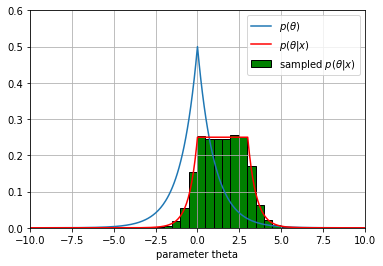

In [6]:
def exercise3(a):
    h=a*numpy.exp(-numpy.abs(x))
    
    # generate 100000 observations of a  U(-10,10) distribution
    theta3 = numpy.random.uniform(-10,10.00005,100000)
    
    # generate 100000 observations U(0,h=0.012) distribution
    u2 = numpy.random.uniform(0,h,100000)
    
    # calculate prior density p(theta)
    prior3 = 0.5*numpy.exp(-numpy.absolute(theta3))
    
    # calculate data generating probabiliy p(x|theta)
    datagen3 = 0.5*numpy.exp(-numpy.absolute(x-theta3))
    
    # calculate q(theta)
    q2 = prior3*datagen3
    
    # algorithm
    accepted2 = q2 > u2
    accepted_theta2 = theta3[accepted2]
            
    # plotting
    
    import matplotlib
    from matplotlib import pyplot as plt
    %matplotlib inline
    exercise1()
    
    # plotting histogram of sampled postrior
    bins_array = numpy.arange(numpy.min(accepted_theta2), numpy.max(accepted_theta2),0.5)
    plt.hist(accepted_theta2, bins = bins_array, color="green",normed=True, edgecolor="black")
    plt.legend([r"$p(\theta)$",r"$p(\theta|x)$",r"sampled $p(\theta|x)$"])
    
    # displaying rejection ratio
    print('Rejection rate: ', ((len(theta3) - len(accepted_theta2))/100000.))
    
exercise3(0.25)

* **Show empirically, that if setting $h$ smaller (e.g. $h = 0.125 e^{-|x|}$), then the posterior is no longer sampled correctly.**

Rejection rate:  0.76367


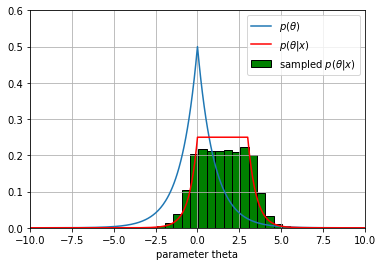

In [7]:
exercise3(0.125)